In [47]:
cd G:/01.projects/COVID-19/Virus_Junction/mRNA/dedup/

G:\01.projects\COVID-19\Virus_Junction\mRNA\dedup


In [48]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [49]:
#anno = pd.read_csv('../sars-cov-2-transcriptome-master/reference/SARS-CoV-2-annotations.gff', sep='\t', names=['chrom', 'type', 'name', 'start', 'end', 'x', 'y', 'z'])
anno = pd.read_csv('../../../reference/SARS-CoV-2-annotations_edited.gff',
                   sep='\t', names=['chrom', 'type', 'name', 'start', 'end', 'x', 'y', 'z'])

In [50]:
orfcolors = {'ORF1a': '#FFF8DC',
 'ORF1b': '#FFE4C4',
 'S': '#7FFFD4',
 'ORF3a': '#F08080',
 'E': '#82c91e',
 'M': '#8470FF',
 'ORF6': '#FF34B3',
 'ORF7a': '#00C78C',
 'ORF7b': '#698B22',
 'ORF8': '#1874CD',
 'N': '#EEEE00',
'ORF10': '#c5d9ea'}

In [51]:
cdsanno = anno[anno['type'] == 'CDS']
cdsanno = cdsanno.iloc[:10].sort_values(by='start')
cdsanno = pd.concat([
    cdsanno,
    pd.DataFrame([
        pd.Series(['chrSCV', 'CDS', 'ORF1a', 269, 13471, '.', '.', '.'], index=cdsanno.columns),
        pd.Series(['chrSCV', 'CDS', 'ORF1b', 13471, 21555, '.', '.', '.'], index=cdsanno.columns),
    ])])
cdsanno = cdsanno.sort_values(by='start').iloc[:, 2:5].reset_index(drop=True)
cdsanno['color'] = cdsanno['name'].apply(orfcolors.__getitem__)
cdsanno.to_pickle('../../../CovidJunction/tmp/cdsannotation-Yan.pickle')
cdsanno

,name,start,end,color
0,ORF1a,269,13471,#FFF8DC
1,ORF1b,13471,21555,#FFE4C4
2,S,21566,25387,#7FFFD4
3,ORF3a,25396,26223,#F08080
4,E,26248,26475,#82c91e
5,M,26526,27194,#8470FF
6,ORF6,27205,27390,#FF34B3
7,ORF7a,27397,27762,#00C78C
8,ORF7b,27759,27890,#698B22
9,ORF8,27897,28262,#1874CD


In [52]:
STRIDESIZE = 10

mpl.rcParams['ytick.labelright'] = True
mpl.rcParams['ytick.labelleft'] = False
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.left'] = False

def plot_hist_6samples(ax, dataA, dataB, dataC, dataD, dataE, dataF, title,xlimfrom = -100, xlimend = 30100):
    dataA, dataB, dataC, dataD, dataE, dataF = dataA.copy(),dataB.copy(),dataC.copy(),dataD.copy(),dataE.copy(),dataF.copy()
    dataA.index,dataB.index,dataC.index,dataD.index,dataE.index,dataF.index = dataA['pos'],dataB['pos'],dataC['pos'],dataD['pos'],dataE['pos'],dataF['pos']
    dataA['binpos'] = np.floor(dataA['pos'] / STRIDESIZE).astype(int) * STRIDESIZE
    dataB['binpos'] = np.floor(dataB['pos'] / STRIDESIZE).astype(int) * STRIDESIZE
    dataC['binpos'] = np.floor(dataC['pos'] / STRIDESIZE).astype(int) * STRIDESIZE
    dataD['binpos'] = np.floor(dataD['pos'] / STRIDESIZE).astype(int) * STRIDESIZE
    dataE['binpos'] = np.floor(dataE['pos'] / STRIDESIZE).astype(int) * STRIDESIZE
    dataF['binpos'] = np.floor(dataF['pos'] / STRIDESIZE).astype(int) * STRIDESIZE
    medcovA = dataA.groupby('binpos').agg({'count': 'median'})
    medcovB = dataB.groupby('binpos').agg({'count': 'median'})
    medcovC = dataC.groupby('binpos').agg({'count': 'median'})
    medcovD = dataD.groupby('binpos').agg({'count': 'median'})
    medcovE = dataE.groupby('binpos').agg({'count': 'median'})
    medcovF = dataF.groupby('binpos').agg({'count': 'median'})
    ax.plot(medcovA.index, np.log10(medcovA['count']).tolist(), c='blue', lw=0.5, label = 'Vero + Virus')
    ax.plot(medcovB.index, np.log10(medcovB['count']).tolist(), c='blue', lw=0.5)
    ax.plot(medcovC.index, np.log10(medcovC['count']).tolist(), c='blue', lw=0.5)
    ax.plot(medcovD.index, np.log10(medcovD['count']).tolist(), c='black', lw=0.5,label='Vero + Virus + RDV')
    ax.plot(medcovE.index, np.log10(medcovE['count']).tolist(), c='black', lw=0.5)
    ax.plot(medcovF.index, np.log10(medcovF['count']).tolist(), c='black', lw=0.5)
    ax.set_xlim(xlimfrom, xlimend)
    ax.set_ylabel(title)
    ax.legend()

    for _, row in cdsanno.iterrows():
        ax.axvspan(row['start'], row['end'], fc=row['color'], alpha=.6, zorder=1)
        if ax is axes[0]:
            ax.annotate(row['name'].replace('ORF', ''),
                        ((row['start'] + row['end'])/2, np.log10(medcovD['count']).max()),
                        fontsize=10)

    for spside in 'top left right'.split():
        plt.setp(ax.spines[spside], visible=False)
    
    ax.grid(True)
    plt.setp(ax.get_xgridlines(), visible=False)


In [53]:
VA10=pd.read_csv('coverage/VA10_unmapped.dedup.mapped.coveragebyPositiveStrand.txt', sep = '\t', names = ['chrom', 'pos', 'count'])
VB10=pd.read_csv('coverage/VB10_unmapped.dedup.mapped.coveragebyPositiveStrand.txt', sep = '\t', names = ['chrom', 'pos', 'count'])
VC10=pd.read_csv('coverage/VC10_unmapped.dedup.mapped.coveragebyPositiveStrand.txt', sep = '\t', names = ['chrom', 'pos', 'count'])
VA12=pd.read_csv('coverage/VA12_unmapped.dedup.mapped.coveragebyPositiveStrand.txt', sep = '\t', names = ['chrom', 'pos', 'count'])
VB12=pd.read_csv('coverage/VB12_unmapped.dedup.mapped.coveragebyPositiveStrand.txt', sep = '\t', names = ['chrom', 'pos', 'count'])
VC12=pd.read_csv('coverage/VC12_unmapped.dedup.mapped.coveragebyPositiveStrand.txt', sep = '\t', names = ['chrom', 'pos', 'count'])


In [54]:
cd G:/01.projects/COVID-19/Virus_Junction/Ribozero/

G:\01.projects\COVID-19\Virus_Junction\Ribozero


In [55]:
STRIDESIZE = 10

mpl.rcParams['ytick.labelright'] = True
mpl.rcParams['ytick.labelleft'] = False
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.left'] = False

def plot_4hist(ax, dataB, dataC, dataNB, dataNC, title,xlimfrom = -100, xlimend = 30100):
    dataB, dataC,dataNB, dataNC = dataB.copy(), dataC.copy(), dataNB.copy(), dataNC.copy()
    dataB.index, dataC.index, dataNB.index, dataNC.index = dataB['pos'], dataC['pos'], dataNB['pos'], dataNC['pos']
    dataB['binpos'] = np.floor(dataB['pos'] / STRIDESIZE).astype(int) * STRIDESIZE
    dataC['binpos'] = np.floor(dataC['pos'] / STRIDESIZE).astype(int) * STRIDESIZE
    dataNB['binpos'] = np.floor(dataNB['pos'] / STRIDESIZE).astype(int) * STRIDESIZE
    dataNC['binpos'] = np.floor(dataNC['pos'] / STRIDESIZE).astype(int) * STRIDESIZE
    medcovB = dataB.groupby('binpos').agg({'count': 'median'})
    medcovC = dataC.groupby('binpos').agg({'count': 'median'})
    medcovNB = dataNB.groupby('binpos').agg({'count': 'median'})
    medcovNC = dataNC.groupby('binpos').agg({'count': 'median'})
    #ax.fill_between(medcov.index, 0, medcov['count'].tolist())
    ax.plot(medcovB.index, np.log10(medcovB['count']).tolist(), c='black', lw=0.5,label = 'Sense Strand')
    ax.plot(medcovC.index, np.log10(medcovC['count']).tolist(), c='black', lw=0.5)
    ax.plot(medcovNB.index, np.log10(medcovNB['count']).tolist(), c='Red', lw=0.5)
    ax.plot(medcovNC.index, np.log10(medcovNC['count']).tolist(), c='Red', lw=0.5, label = 'Anti-Sense Strand')
    #ax.set_xlim(-100, 30100)
    ax.set_xlim(xlimfrom, xlimend)
    ax.set_ylabel(title)
    ax.legend()

    for _, row in cdsanno.iterrows():
        ax.axvspan(row['start'], row['end'], fc=row['color'], alpha=.6, zorder=1)
        if ax is axes[0]:
            ax.annotate(row['name'].replace('ORF', ''),
                        ((row['start'] + row['end'])/2, np.log10(medcovB['count']).max()),
                        fontsize=10)

    for spside in 'top left right'.split():
        plt.setp(ax.spines[spside], visible=False)
    
    ax.grid(True)
    plt.setp(ax.get_xgridlines(), visible=False)


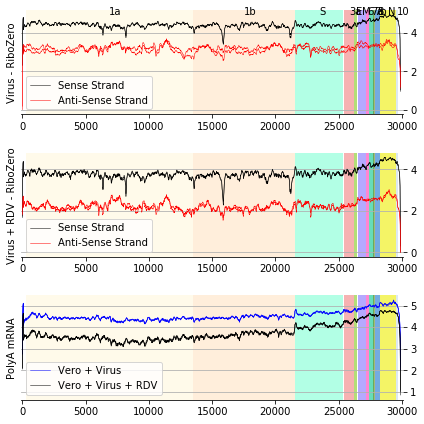

In [56]:
VB10P = pd.read_csv('ORF_Coverage/dedup/VB10_FKDL202572643-1a.dedup.mapped.coveragebyStrand.txt', sep = '\t', names = ['chrom', 'pos', 'count'])
VB10N= pd.read_csv('ORF_Coverage/dedup/VB10_FKDL202572643-1a.dedup.mapped.coveragebyNegativeStrand.txt', sep = '\t', names = ['chrom', 'pos', 'count'])
VC10P = pd.read_csv('ORF_Coverage/dedup/VC10_FKDL202572645-1a.dedup.mapped.coveragebyStrand.txt', sep = '\t', names = ['chrom', 'pos', 'count'])
VC10N = pd.read_csv('ORF_Coverage/dedup/VC10_FKDL202572645-1a.dedup.mapped.coveragebyNegativeStrand.txt', sep = '\t', names = ['chrom', 'pos', 'count'])
VB12P = pd.read_csv('ORF_Coverage/dedup/VB12_FKDL202572644-1a.dedup.mapped.coveragebyStrand.txt', sep = '\t', names = ['chrom', 'pos', 'count'])
VB12N = pd.read_csv('ORF_Coverage/dedup/VB12_FKDL202572644-1a.dedup.mapped.coveragebyNegativeStrand.txt', sep = '\t', names = ['chrom', 'pos', 'count'])
VC12P = pd.read_csv('ORF_Coverage/dedup/VC12_FKDL202572646-1a.dedup.mapped.coveragebyStrand.txt', sep = '\t', names = ['chrom', 'pos', 'count'])
VC12N = pd.read_csv('ORF_Coverage/dedup/VC12_FKDL202572646-1a.dedup.mapped.coveragebyNegativeStrand.txt', sep = '\t', names = ['chrom', 'pos', 'count'])


V10P = pd.concat([VB10P, VC10P])
V12P = pd.concat([VB12P, VC12P])
V10N = pd.concat([VB10N, VC10N])
V12N = pd.concat([VB12N, VC12N])
V10P.index = V10P['pos']
V12P.index = V12P['pos']
V10N.index = V10N['pos']
V12N.index = V12N['pos']

fig, axes = plt.subplots(3, 1, figsize=(6,6))
plot_4hist(axes[0], VB10P, VC10P, VB10N, VC10N, 'Virus - RiboZero')
plot_4hist(axes[1], VB12P, VC12P,VB12N, VC12N, 'Virus + RDV - RiboZero')
plot_hist_6samples(axes[2], VA10, VB10, VC10, VA12, VB12, VC12, 'PolyA mRNA')
plt.tight_layout()
plt.savefig('ORF_Coverage/dedup/readdepth_Vero24h.pdf',dpi=600)

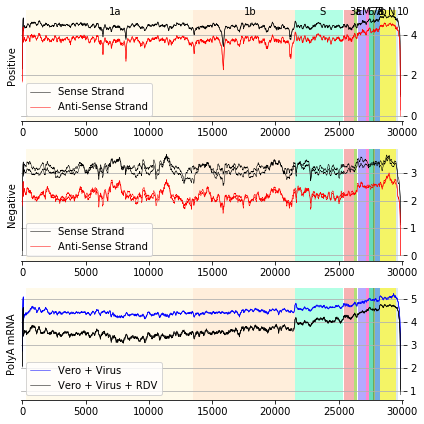

In [64]:

fig, axes = plt.subplots(3, 1, figsize=(6,6))
plot_4hist(axes[0], VB10P, VC10P, VB12P, VC12P, 'Positive')
plot_4hist(axes[1], VB10N, VC10N,VB12N, VC12N, 'Negative')
plot_hist_6samples(axes[2], VA10, VB10, VC10, VA12, VB12, VC12, 'PolyA mRNA')
plt.tight_layout()
plt.savefig('ORF_Coverage/dedup/readdepth_Vero24h_bystrand.pdf',dpi=600)

In [59]:
VA10.head()

,chrom,pos,count
0,MT123290.1,0,92
1,MT123290.1,1,187
2,MT123290.1,2,269
3,MT123290.1,3,370
4,MT123290.1,4,490


In [23]:
V10sum = np.sum(V10P['count'])+np.sum(V10N['count'])
V12sum = np.sum(V12P['count'])+np.sum(V12N['count'])
print(np.sum(V10P['count'])/V10sum,np.sum(V10N['count'])/V10sum)
print(np.sum(V12P['count'])/V12sum,np.sum(V12N['count'])/V12sum)

0.9470751998139848 0.05292480018601523
0.9740671560656611 0.02593284393433897


In [42]:
import os
V10Bsum = np.sum(VB10P['count'])+np.sum(VB10N['count'])
V10Csum = np.sum(VC10P['count'])+np.sum(VC10N['count'])
V12Bsum = np.sum(VB12P['count'])+np.sum(VB12N['count'])
V12Csum = np.sum(VC12P['count'])+np.sum(VC12N['count'])
print(np.sum(VB10P['count'])/V10Bsum,np.sum(VB10N['count'])/V10Bsum)
print(np.sum(VC10P['count'])/V10Csum,np.sum(VC10N['count'])/V10Csum)
print(np.sum(VB12P['count'])/V12Bsum,np.sum(VB12N['count'])/V12Bsum)
print(np.sum(VC12P['count'])/V12Csum,np.sum(VC12N['count'])/V12Csum)
df = {}
df = {'Positive':[np.sum(VB10P['count'])/V10Bsum,np.sum(VC10P['count'])/V10Csum,np.sum(VB12P['count'])/V12Bsum,np.sum(VC12P['count'])/V12Csum],
     "Negative":[np.sum(VB10N['count'])/V10Bsum, np.sum(VC10N['count'])/V10Csum, np.sum(VB12N['count'])/V12Bsum, np.sum(VC12N['count'])/V12Csum]}
df = pd.DataFrame.from_dict(df, orient='index',
                        columns= ['Virus-Rep1','Virus-Rep2','Virus+RDV-Rep1','Virus+RDV-Rep2'])
df.to_csv(os.path.join('ORF_Coverage/dedup/', 'StrandPCT.csv'))
df

0.9399242339326097 0.06007576606739027
0.9543961527576023 0.045603847242397695
0.9747429992676977 0.025257000732302276
0.9734292491468021 0.02657075085319799


,Virus-Rep1,Virus-Rep2,Virus+RDV-Rep1,Virus+RDV-Rep2
Positive,0.939924,0.954396,0.974743,0.973429
Negative,0.060076,0.045604,0.025257,0.026571


In [45]:
df = {}
df = {'Positive':[np.sum(VB10P['count']),np.sum(VC10P['count']),np.sum(VB12P['count']),np.sum(VC12P['count'])],
     "Negative":[np.sum(VB10N['count']), np.sum(VC10N['count']), np.sum(VB12N['count']), np.sum(VC12N['count'])],
     "Total":[V10Bsum, V10Csum, V12Bsum, V12Csum],
     'Target_coverage':[2e8,2e8,2e8,2e8],
     'ds_ratio':[2e8/V10Bsum, 2e8/V10Csum, 2e8/V12Bsum, 2e8/V12Csum]}
df = pd.DataFrame.from_dict(df, orient='index',
                        columns= ['Virus-Rep1','Virus-Rep2','Virus+RDV-Rep1','Virus+RDV-Rep2'])
df.to_csv(os.path.join('ORF_Coverage/dedup/', 'StrandCoverages.csv'))
df

,Virus-Rep1,Virus-Rep2,Virus+RDV-Rep1,Virus+RDV-Rep2
Positive,8.798544e+08,8.726574e+08,2.139024e+08,2.263177e+08
Negative,5.623637e+07,4.169813e+07,5.542520e+06,6.177574e+06
Total,9.360908e+08,9.143555e+08,2.194449e+08,2.324953e+08
Target_coverage,2.000000e+08,2.000000e+08,2.000000e+08,2.000000e+08
ds_ratio,2.136545e-01,2.187333e-01,9.113905e-01,8.602325e-01


In [63]:
df = {}
df = {
     "Total":[np.sum(VA10['count']), np.sum(VB10['count']),np.sum(VC10['count']),np.sum(VA12['count']), np.sum(VB12['count']),np.sum(VC12['count']) ],
     'Target_coverage':[2e8,2e8,2e8,2e8,2e8,2e8],
     'ds_ratio':[2e8/np.sum(VA10['count']), 2e8/np.sum(VB10['count']),2e8/np.sum(VC10['count']),
                 2e8/np.sum(VA12['count']), 2e8/np.sum(VB12['count']),2e8/np.sum(VC12['count']) ]}
df = pd.DataFrame.from_dict(df, orient='index',
                        columns= ['Virus-Rep1','Virus-Rep2','Virus-Rep3','Virus+RDV-Rep1','Virus+RDV-Rep2','Virus+RDV-Rep3'])
df.to_csv(os.path.join('ORF_Coverage/dedup/', 'PolyACoverages.csv'))
df

,Virus-Rep1,Virus-Rep2,Virus-Rep3,Virus+RDV-Rep1,Virus+RDV-Rep2,Virus+RDV-Rep3
Total,1.138624e+09,1.190564e+09,1.114784e+09,2.795782e+08,2.681599e+08,2.853617e+08
Target_coverage,2.000000e+08,2.000000e+08,2.000000e+08,2.000000e+08,2.000000e+08,2.000000e+08
ds_ratio,1.756507e-01,1.679876e-01,1.794070e-01,7.153634e-01,7.458237e-01,7.008649e-01


In [40]:
dir='G:/01.projects/COVID-19/Virus_Junction/Ribozero/jumps_bystrand/dedup/summary'
Allcounts = pd.read_csv(os.path.join(dir, 'Allcounts_pct20200726.csv'), header = 0)
Allcounts.head()

,orf,count,order,color,pct,sample,strand,group
0,ORF1ab,0,0,#FFF8DC,0.000000,VB10(+),+,V10
1,S,6570,1,#7FFFD4,0.075195,VB10(+),+,V10
2,ORF3a,4738,2,#F08080,0.054227,VB10(+),+,V10
3,E,1825,3,#82c91e,0.020887,VB10(+),+,V10
4,M,6292,4,#8470FF,0.072013,VB10(+),+,V10


In [66]:
Allcounts['Total'] = 0
Allcounts['Total'].loc[Allcounts['sample'] == 'VB10(+)'] = 9.360908e+08
Allcounts['Total'].loc[Allcounts['sample'] == 'VB10(-)'] = 9.360908e+08
Allcounts['Total'].loc[Allcounts['sample'] == 'VC10(+)'] = 9.143555e+08
Allcounts['Total'].loc[Allcounts['sample'] == 'VC10(-)'] = 9.143555e+08
Allcounts['Total'].loc[Allcounts['sample'] == 'VB12(+)'] = 2.194449e+08
Allcounts['Total'].loc[Allcounts['sample'] == 'VB12(-)'] = 2.194449e+08
Allcounts['Total'].loc[Allcounts['sample'] == 'VC12(+)'] = 2.324953e+08
Allcounts['Total'].loc[Allcounts['sample'] == 'VC12(-)'] = 2.324953e+08
Allcounts['CPM'] = Allcounts['count']/Allcounts['Total']*1e6
Allcounts.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,orf,count,order,color,pct,sample,strand,group,Total,CPM
0,ORF1ab,0,0,#FFF8DC,0.000000,VB10(+),+,V10,936090800.0,0.000000
1,S,6570,1,#7FFFD4,0.075195,VB10(+),+,V10,936090800.0,7.018550
2,ORF3a,4738,2,#F08080,0.054227,VB10(+),+,V10,936090800.0,5.061475
3,E,1825,3,#82c91e,0.020887,VB10(+),+,V10,936090800.0,1.949597
4,M,6292,4,#8470FF,0.072013,VB10(+),+,V10,936090800.0,6.721570


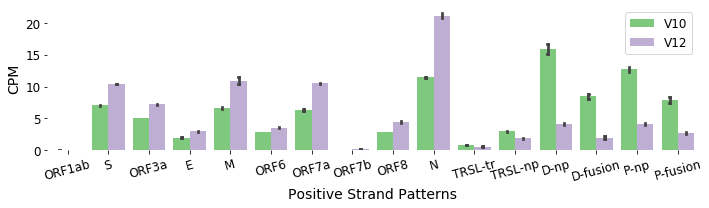

In [73]:
mpl.rcParams['ytick.labelright'] = False
mpl.rcParams['ytick.labelleft'] = True
mpl.rcParams['ytick.right'] = False
mpl.rcParams['ytick.left'] = True
import seaborn as sns
Allcounts.index = Allcounts['orf']
#colors = ['lightcoral', 'indianred', 'red', 'palegreen', 'lightgreen', 'forestgreen', 'lightsteelblue', 'cornflowerblue', 'royalblue']
#colors=[  'lightpink','hotpink', 'deeppink','#FA8072',  '#FF6347', '#FF4500', 'lightsteelblue', 'cornflowerblue', 'royalblue']
colors = ['#EE5C42', '#CD4F39', '#8B3626', '#00EE76', '#00CD66','#008B45','#00E5EE', '#00C5CD', '#00868B']#  '#7A67EE', '#6959CD', '#473C8B']
plt.figure(figsize = (10, 3) )
ax = sns.barplot(x = 'orf', y = 'CPM', hue = 'group', data = Allcounts[Allcounts['strand'] == '+'],
            palette = 'Accent',
            #palette = colors,
            order = Allcounts['orf'].unique(),  
            saturation = 100,
            ##edgecolor = 'w'
            capsize = 0.01
            )
plt.xlabel('Positive Strand Patterns', fontdict={ 'size'   : 14})
plt.ylabel('CPM', fontdict={ 'size'   : 14})
plt.yticks( size = 12)
plt.xticks(rotation = 15, size = 12)
plt.legend(prop={ 'size'   : 12})

#sns.plotting_context({'font.size': 80 })
sns.despine(left = True, bottom = True)
plt.tight_layout()
dir='G:/01.projects/COVID-19/Virus_Junction/Ribozero/jumps_bystrand/dedup/summary'
plt.savefig(os.path.join(dir, 'Vero-allORF-bar(+)-CPM.pdf'),dpi = 600)

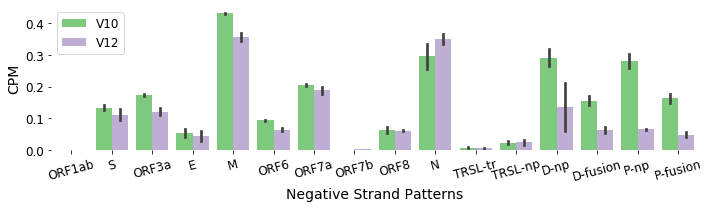

In [74]:
Allcounts.index = Allcounts['orf']
#colors = ['lightcoral', 'indianred', 'red', 'palegreen', 'lightgreen', 'forestgreen', 'lightsteelblue', 'cornflowerblue', 'royalblue']
#colors=[  'lightpink','hotpink', 'deeppink','#FA8072',  '#FF6347', '#FF4500', 'lightsteelblue', 'cornflowerblue', 'royalblue']
colors = ['#EE5C42', '#CD4F39', '#8B3626', '#00EE76', '#00CD66','#008B45','#00E5EE', '#00C5CD', '#00868B']#  '#7A67EE', '#6959CD', '#473C8B']
plt.figure(figsize = (10, 3) )
ax = sns.barplot(x = 'orf', y = 'CPM', hue = 'group', data = Allcounts[Allcounts['strand'] == '-'],
            palette = 'Accent',
            #palette = colors,
            order = Allcounts['orf'].unique(),  
            saturation = 100,
            ##edgecolor = 'w'
            #capsize = 0.01,linewidth = 1
            )
plt.xlabel('Negative Strand Patterns', fontdict={ 'size'   : 14})
plt.ylabel('CPM', fontdict={ 'size'   : 14})
plt.yticks( size = 12)
plt.xticks( rotation = 15,size = 12)
plt.legend(prop={ 'size'   : 12})

#sns.plotting_context({'font.size': 80 })
sns.despine(left = True, bottom = True)
plt.tight_layout()
plt.savefig(os.path.join(dir, 'Vero-allORF-bar(-)-CPM.pdf'))

In [75]:
Allcounts.head()

,orf,count,order,color,pct,sample,strand,group,Total,CPM
orf,,,,,,,,,,
ORF1ab,ORF1ab,0,0,#FFF8DC,0.000000,VB10(+),+,V10,936090800.0,0.000000
S,S,6570,1,#7FFFD4,0.075195,VB10(+),+,V10,936090800.0,7.018550
ORF3a,ORF3a,4738,2,#F08080,0.054227,VB10(+),+,V10,936090800.0,5.061475
E,E,1825,3,#82c91e,0.020887,VB10(+),+,V10,936090800.0,1.949597
M,M,6292,4,#8470FF,0.072013,VB10(+),+,V10,936090800.0,6.721570


In [87]:
import scipy.stats as stats
import seaborn as sns
def subpairs(Allcounts,  dir):
    Allcounts = Allcounts.copy()
    subcounts = Allcounts.loc[(Allcounts['group'] == 'V10')|(Allcounts['group'] == 'V12')]
    subcounts.loc[subcounts['group'] == 'V10','group'] = 'Virus'
    subcounts.loc[subcounts['group'] == 'V12','group'] = 'Virus + RDV'
    subcounts['normcount'] = 0
    subcounts['class'] = subcounts['sample'].str.strip('[(+)]').str.strip('[(-)]')
    #for sample in subcounts['class'].unique():
    #    temp = subcounts.loc[subcounts['class'] == str(sample)]['count'].copy()
    #    subcounts.loc[subcounts['class'] == str(sample),'normcount'] = temp*1e6/temp.sum()
    #subcounts['log2count'] = np.log2(subcounts['normcount'])
    #plt.figure(figsize = (8,5))
    font = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 16}
    font1 = {'family' : 'Times New Roman',
    'weight' : 900,
    'size'   : 16}
    fig = plt.figure(figsize = (16,13))
    #plot_pos = np.append(range(441, 450),range(4410,4417))
    #plot_pos = range(421, 429)
    plot_pos = [[i,j] for i in range(4) for j in range(4)]
    sns.set(style="white")
    df = pd.DataFrame([['orfs','stat','p']])
    cordf = pd.DataFrame([['orfs','stat','p']])
    for gene, pos in zip(subcounts['orf'].drop(index = 'ORF7b').unique()[1:], plot_pos):
        ax = plt.subplot2grid((4,4),pos) 
        subpos = subcounts.loc[(subcounts['strand'] == '+') & (subcounts['orf'] == gene)]
        sns.pointplot(x='group', y = 'CPM',hue = 'orf',  color = 'black', data = subpos)
        ax.set_ylabel( 'CPM', font)
        ax.set_xlabel( 'Sample', font)
        ax.legend(prop = font1)
        ax1 = ax.twinx()
        subneg = subcounts.loc[(subcounts['strand'] == '-') & (subcounts['orf'] == gene)]
        sns.pointplot(x='group', y = 'CPM',  color = 'blue', linestyles = ['--']*subcounts['orf'].nunique(), data = subneg)
        posmax = subcounts.loc[(subcounts['strand'] == '+') & (subcounts['orf'] == gene)]['CPM'].max()
        posmin = subcounts.loc[(subcounts['strand'] == '+') & (subcounts['orf'] == gene)]['CPM'].min()
        negmax = subcounts.loc[(subcounts['strand'] == '-') & (subcounts['orf'] == gene)]['CPM'].max()
        negmin = subcounts.loc[(subcounts['strand'] == '-') & (subcounts['orf'] == gene)]['CPM'].min()
        diff = max(int(posmax)-int(posmin), int(negmax) - int(negmin))
        head = max(posmax, negmax)
        tail = min(posmin, negmin)
        stat, p = stats.levene(subpos['CPM'], subneg['CPM'],center='mean')
        print(stat, p)
        df = df.append([[gene, stat,p]])
        #F-test
        #F = np.var(subpos['log2count']) / np.var(subneg['log2count'])
        #df1 = len(subpos['log2count']) - 1
        #df2 = len(subneg['log2count']) - 1
        #p = 1 - 2 * abs(0.5 - stats.f.cdf(F, df1, df2))
        #stat, p = stats.spearmanr(subpos['log2count'], subneg['log2count'])
        stat, p = stats.pearsonr(subpos['CPM'], subneg['CPM'])
        cordf = cordf.append([[gene, stat, p]])
        #stat, p = stats.kendalltau(subpos['log2count'], subneg['log2count'])
        #stat, p = stats.kendalltau(subcounts.loc[(subcounts['orf'] == gene)&(subcounts['group'] == 'V10')]['log2count'], 
         #                          subcounts.loc[(subcounts['orf'] == gene)&(subcounts['group'] == 'V12')]['log2count'])
        #print(stat, p)
        #stat, p = stats.ttest_ind(subpos['log2count'], subneg['log2count'], equal_var = False)
        #stat, p = stats.ks_2samp(subpos['log2count'], subneg['log2count'])
        #stat, p = stats.wilcoxon(subpos['log2count'], subneg['log2count'], correction = True, alternative = 'greater')
        #ax.text(0, int(posmax) - diff -1 , 'p = %.3f'%p, font)
        #ax1.text(0, int(negmax)-diff +0.5, '-log10(p) = %.2f'%-np.log10(p), font)
        
        
        #ax1.text(0, int(negmax)-diff +0.8, 'cor = %.3f'%stat, font)
        #ax1.text(0, int(negmax)-diff +0.5, 'p = %.3f'%p, font)
        ax.set_yticks(np.arange(int(posmax)-diff,int(posmax)+1.5, 1))
        ax1.set_yticks(np.arange(int(negmax)-diff, int(negmax)+1.5, 1))
        ax1.set_ylabel( 'CPM', font,color = 'blue')
    
    df.to_csv(os.path.join(dir, 'Levene_pvalues.csv'),index=0,header=0)
    cordf.to_csv(os.path.join(dir, 'PearsonCor_pvalues.csv'),index=0,header=0)
    #plt.legend(prop = font1)
    #plt.xticks(family = 'Times New Roman',fontsize = 10)
    #plt.yticks(family = 'Times New Roman', fontsize = 10)
    #plt.xlabel('Sample', font)
    #plt.ylabel('Log2Count', font)
    plt.tight_layout()
    plt.savefig(os.path.join(dir, 'sns_pointplot_orf_sub_Pearson_normbyTotal.pdf'),dpi = 600)
   
    plt.show()

2308.8531068387456 5.446983255512066e-09
290.88537860469046 2.5993004881493653e-06
344.6235408709705 1.5761130193866938e-06
96.24242512274789 6.459623209876171e-05
135.16389983843862 2.4388183285733685e-05
1719.9799490378182 1.3145087983890128e-08
126.31440806590064 2.9648955176075792e-05
853.4230648731286 1.0661616185023274e-07
38.751740161790856 0.0007943643350517016
281.23828986299424 2.8708359147692933e-06
292.48116112225046 2.5577273385445324e-06
246.87924429103754 4.211790025438538e-06
443.16290275671946 7.486515597800221e-07
160.98235432676123 1.4697129041369732e-05


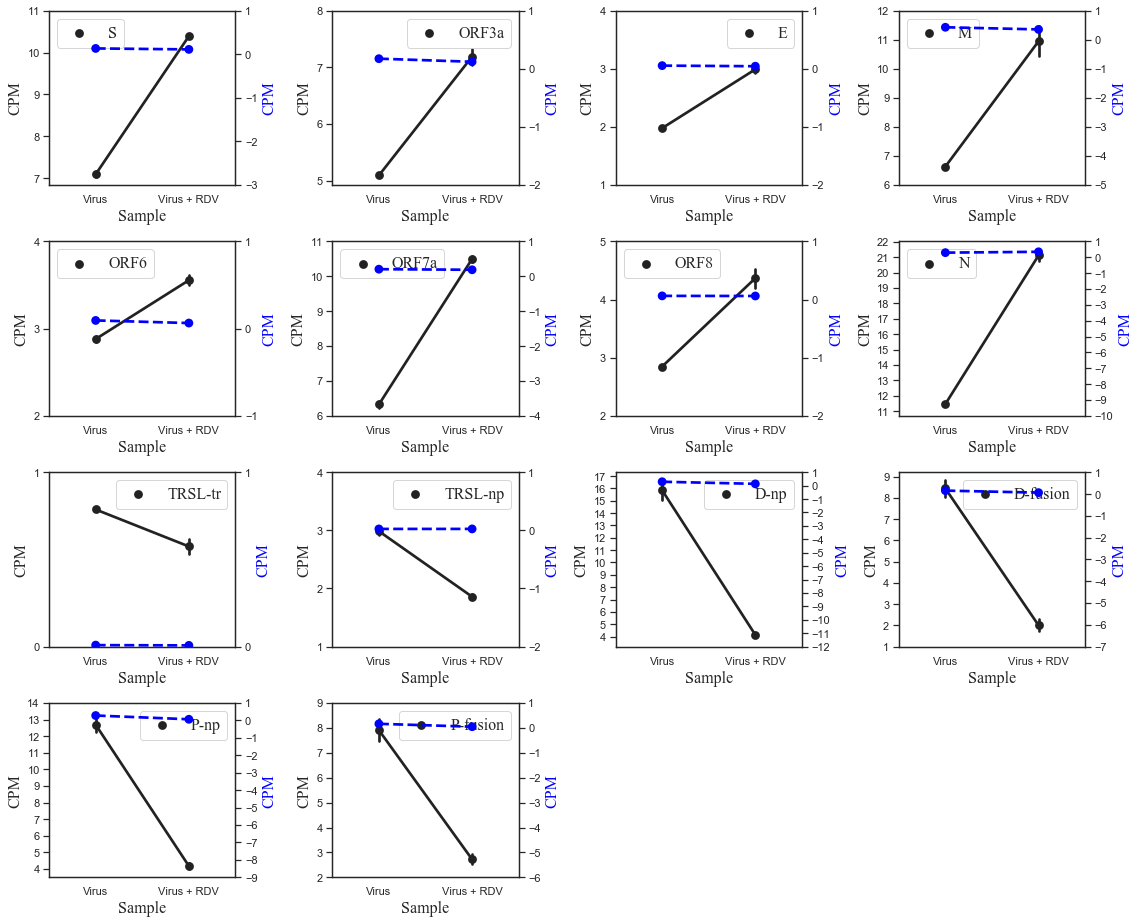

In [88]:
Allcounts.index = Allcounts['orf']
subpairs(Allcounts, dir)

In [89]:
import scipy.stats as stats
import seaborn as sns
def subpairs(Allcounts,  dir):
    Allcounts = Allcounts.copy()
    subcounts = Allcounts.loc[(Allcounts['group'] == 'V10')|(Allcounts['group'] == 'V12')]
    subcounts.loc[subcounts['group'] == 'V10','group'] = 'Virus'
    subcounts.loc[subcounts['group'] == 'V12','group'] = 'Virus + RDV'
    subcounts['normcount'] = 0
    subcounts['class'] = subcounts['sample'].str.strip('[(+)]').str.strip('[(-)]')
    #for sample in subcounts['class'].unique():
    #    temp = subcounts.loc[subcounts['class'] == str(sample)]['count'].copy()
    #    subcounts.loc[subcounts['class'] == str(sample),'normcount'] = temp*1e6/temp.sum()
    #subcounts['log2count'] = np.log2(subcounts['normcount'])
    #plt.figure(figsize = (8,5))
    subcounts['log2CPM'] = np.log2(subcounts['CPM'])
    font = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 16}
    font1 = {'family' : 'Times New Roman',
    'weight' : 900,
    'size'   : 16}
    fig = plt.figure(figsize = (16,13))
    #plot_pos = np.append(range(441, 450),range(4410,4417))
    #plot_pos = range(421, 429)
    plot_pos = [[i,j] for i in range(4) for j in range(4)]
    sns.set(style="white")
    df = pd.DataFrame([['orfs','stat','p']])
    cordf = pd.DataFrame([['orfs','stat','p']])
    for gene, pos in zip(subcounts['orf'].drop(index = 'ORF7b').unique()[1:9], plot_pos):
        ax = plt.subplot2grid((4,4),pos) 
        subpos = subcounts.loc[(subcounts['strand'] == '+') & (subcounts['orf'] == gene)]
        sns.pointplot(x='group', y = 'log2CPM',hue = 'orf',  color = 'black', data = subpos)
        ax.set_ylabel( 'Log2CPM', font)
        ax.set_xlabel( 'Sample', font)
        ax.legend(prop = font1)
        ax1 = ax.twinx()
        subneg = subcounts.loc[(subcounts['strand'] == '-') & (subcounts['orf'] == gene)]
        sns.pointplot(x='group', y = 'log2CPM',  color = 'blue', linestyles = ['--']*subcounts['orf'].nunique(), data = subneg)
        posmax = subcounts.loc[(subcounts['strand'] == '+') & (subcounts['orf'] == gene)]['log2CPM'].max()
        posmin = subcounts.loc[(subcounts['strand'] == '+') & (subcounts['orf'] == gene)]['log2CPM'].min()
        negmax = subcounts.loc[(subcounts['strand'] == '-') & (subcounts['orf'] == gene)]['log2CPM'].max()
        negmin = subcounts.loc[(subcounts['strand'] == '-') & (subcounts['orf'] == gene)]['log2CPM'].min()
        diff = max(int(posmax)-int(posmin), int(negmax) - int(negmin))
        head = max(posmax, negmax)
        tail = min(posmin, negmin)
        stat, p = stats.levene(subpos['CPM'], subneg['CPM'],center='mean')
        print(stat, p)
        df = df.append([[gene, stat,p]])
        #F-test
        #F = np.var(subpos['log2count']) / np.var(subneg['log2count'])
        #df1 = len(subpos['log2count']) - 1
        #df2 = len(subneg['log2count']) - 1
        #p = 1 - 2 * abs(0.5 - stats.f.cdf(F, df1, df2))
        #stat, p = stats.spearmanr(subpos['log2count'], subneg['log2count'])
        stat, p = stats.pearsonr(subpos['CPM'], subneg['CPM'])
        cordf = cordf.append([[gene, stat, p]])
        #stat, p = stats.kendalltau(subpos['log2count'], subneg['log2count'])
        #stat, p = stats.kendalltau(subcounts.loc[(subcounts['orf'] == gene)&(subcounts['group'] == 'V10')]['log2count'], 
         #                          subcounts.loc[(subcounts['orf'] == gene)&(subcounts['group'] == 'V12')]['log2count'])
        #print(stat, p)
        #stat, p = stats.ttest_ind(subpos['log2count'], subneg['log2count'], equal_var = False)
        #stat, p = stats.ks_2samp(subpos['log2count'], subneg['log2count'])
        #stat, p = stats.wilcoxon(subpos['log2count'], subneg['log2count'], correction = True, alternative = 'greater')
        #ax.text(0, int(posmax) - diff -1 , 'p = %.3f'%p, font)
        #ax1.text(0, int(negmax)-diff +0.5, '-log10(p) = %.2f'%-np.log10(p), font)
        
        
        #ax1.text(0, int(negmax)-diff +0.8, 'cor = %.3f'%stat, font)
        #ax1.text(0, int(negmax)-diff +0.5, 'p = %.3f'%p, font)
        ax.set_yticks(np.arange(int(posmax)-diff,int(posmax)+1.5, 1))
        ax1.set_yticks(np.arange(int(negmax)-diff, int(negmax)+1.5, 1))
        ax1.set_ylabel( 'Log2CPM', font,color = 'blue')
    
    df.to_csv(os.path.join(dir, 'Levene_pvalues.csv'),index=0,header=0)
    cordf.to_csv(os.path.join(dir, 'PearsonCor_pvalues.csv'),index=0,header=0)
    #plt.legend(prop = font1)
    #plt.xticks(family = 'Times New Roman',fontsize = 10)
    #plt.yticks(family = 'Times New Roman', fontsize = 10)
    #plt.xlabel('Sample', font)
    #plt.ylabel('Log2Count', font)
    plt.tight_layout()
    plt.savefig(os.path.join(dir, 'sns_pointplot_orf_log2CPM_normbyTotal.pdf'),dpi = 600)
   
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


2308.8531068387456 5.446983255512066e-09
290.88537860469046 2.5993004881493653e-06
344.6235408709705 1.5761130193866938e-06
96.24242512274789 6.459623209876171e-05
135.16389983843862 2.4388183285733685e-05
1719.9799490378182 1.3145087983890128e-08
126.31440806590064 2.9648955176075792e-05
853.4230648731286 1.0661616185023274e-07


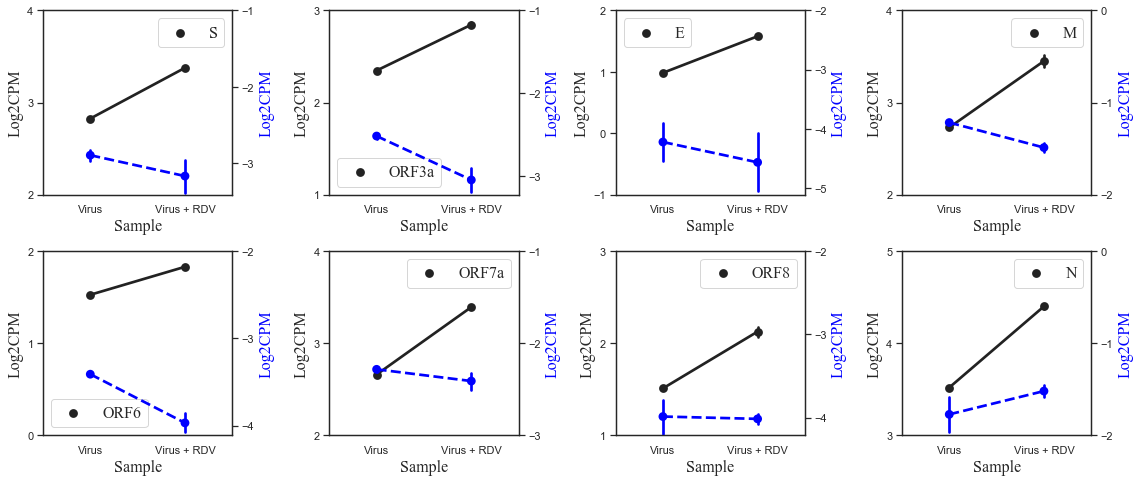

In [90]:
Allcounts.index = Allcounts['orf']
subpairs(Allcounts, dir)

In [86]:
df = {}
df = {'Positive':[np.sum(VB10P['count']),np.sum(VC10P['count']),np.sum(VB12P['count']),np.sum(VC12P['count'])],
     "Negative":[np.sum(VB10N['count']), np.sum(VC10N['count']), np.sum(VB12N['count']), np.sum(VC12N['count'])],
     "Total":[V10Bsum, V10Csum, V12Bsum, V12Csum],
      'PosJuncs':[np.sum(Allcounts['count'].loc[Allcounts['sample'] == 'VB10(+)']), 
                  np.sum(Allcounts['count'].loc[Allcounts['sample'] == 'VC10(+)']),
                 np.sum(Allcounts['count'].loc[Allcounts['sample'] == 'VB12(+)']),
                 np.sum(Allcounts['count'].loc[Allcounts['sample'] == 'VC12(+)']),],
      'NegJuncs':[np.sum(Allcounts['count'].loc[Allcounts['sample'] == 'VB10(-)']), 
                  np.sum(Allcounts['count'].loc[Allcounts['sample'] == 'VC10(-)']),
                 np.sum(Allcounts['count'].loc[Allcounts['sample'] == 'VB12(-)']),
                 np.sum(Allcounts['count'].loc[Allcounts['sample'] == 'VC12(-)']),],
     
     'Target_coverage':[2e8,2e8,2e8,2e8],
     'ds_ratio':[2e8/V10Bsum, 2e8/V10Csum, 2e8/V12Bsum, 2e8/V12Csum]}
df = pd.DataFrame.from_dict(df, orient='index',
                        columns= ['Virus-Rep1','Virus-Rep2','Virus+RDV-Rep1','Virus+RDV-Rep2'])
df = df.transpose()
df['TotalJuncs'] = df['PosJuncs'] + df['NegJuncs']
df['PosJuncsPct(%)'] = df['PosJuncs']/df['Total']*100
df['NegJuncsPct(%)'] = df['NegJuncs']/df['Total']*100
df['TotalJuncsPct(%)'] = df['TotalJuncs']/df['Total']*100
df.to_csv(os.path.join('ORF_Coverage/dedup/', 'StrandCoverages.csv'))
df

,Positive,Negative,Total,PosJuncs,NegJuncs,Target_coverage,ds_ratio,TotalJuncs,PosJuncsPct(%),NegJuncsPct(%),TotalJuncsPct(%)
Virus-Rep1,879854445.0,56236373.0,936090818.0,85157.0,2216.0,200000000.0,0.213654,87373.0,0.009097,0.000237,0.009334
Virus-Rep2,872657360.0,41698128.0,914355488.0,87044.0,2184.0,200000000.0,0.218733,89228.0,0.009520,0.000239,0.009759
Virus+RDV-Rep1,213902380.0,5542520.0,219444900.0,19172.0,340.0,200000000.0,0.911391,19512.0,0.008737,0.000155,0.008892
Virus+RDV-Rep2,226317700.0,6177574.0,232495274.0,19990.0,405.0,200000000.0,0.860233,20395.0,0.008598,0.000174,0.008772
